In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from keras.src.layers import BatchNormalization
from tqdm import tqdm
import os


KeyboardInterrupt



# Make the dataset - Put Images in Train, Test and Val folders

In [2]:
emotion_map = {
    0:"angry",
    1:"disgust",
    2:"fear",
    3:"happy",
    4:"sad",
    5:"surprise",
    6:"neutral"
}

In [22]:
outer_names = ["train", "test", "val"]
inner_names = ["angry","disgust","fear", "happy", "sad", "surprise","neutral"]

for outer_name in outer_names:
    os.makedirs(os.path.join("../data/fer2013",outer_name), exist_ok = True)
    for inner_name in inner_names:
        os.makedirs(os.path.join("../data/fer2013",outer_name,inner_name), exist_ok = True)

In [25]:
angry = 0
disgust = 0
fear = 0
happy = 0
sad = 0
surprise = 0
neutral = 0
angry_val = 0
disgust_val = 0
fear_val = 0
happy_val = 0
sad_val = 0
surprise_val = 0
neutral_val = 0
angry_test = 0
disgust_test = 0
fear_test = 0
happy_test = 0
sad_test = 0
surprise_test = 0
neutral_test = 0

In [26]:
df = pd.read_csv("../data/fer2013/fer2013.csv")
mat = np.zeros((48,48),dtype=np.uint8)

In [27]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [28]:
# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 21005: #28709 full dataset
        if df['emotion'][i] == 0:
            img.save('../data/fer2013/train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('../data/fer2013/train/disgust/im'+str(disgust)+'.png')
            disgust += 1
        elif df['emotion'][i] == 2:
            img.save('../data/fer2013/train/fear/im'+str(fear)+'.png')
            fear += 1
        elif df['emotion'][i] == 3:
            img.save('../data/fer2013/train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('../data/fer2013/train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('../data/fer2013/train/surprise/im'+str(surprise)+'.png')
            surprise += 1
        elif df['emotion'][i] == 6:
            img.save('../data/fer2013/train/neutral/im'+str(neutral)+'.png')
            neutral += 1
    # val
    elif i>21005 and i<23627:
        if df['emotion'][i] == 0:
            img.save('../data/fer2013/val/angry/im'+str(angry_val)+'.png')
            angry_val += 1
        elif df['emotion'][i] == 1:
            img.save('../data/fer2013/val/disgust/im'+str(disgust_val)+'.png')
            disgust_val += 1
        elif df['emotion'][i] == 2:
            img.save('../data/fer2013/val/fear/im'+str(fear_val)+'.png')
            fear_val += 1
        elif df['emotion'][i] == 3:
            img.save('../data/fer2013/val/happy/im'+str(happy_val)+'.png')
            happy_val += 1
        elif df['emotion'][i] == 4:
            img.save('../data/fer2013/val/sad/im'+str(sad_val)+'.png')
            sad_val += 1
        elif df['emotion'][i] == 5:
            img.save('../data/fer2013/val/surprise/im'+str(surprise_val)+'.png')
            surprise_val += 1
        elif df['emotion'][i] == 6:
            img.save('../data/fer2013/val/neutral/im'+str(neutral_val)+'.png')
            neutral_val += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('../data/fer2013/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('../data/fer2013/test/disgust/im'+str(disgust_test)+'.png')
            disgust_test += 1
        elif df['emotion'][i] == 2:
            img.save('../data/fer2013/test/fear/im'+str(fear_test)+'.png')
            fear_test += 1
        elif df['emotion'][i] == 3:
            img.save('../data/fer2013/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('../data/fer2013/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 5:
            img.save('../data/fer2013/test/surprise/im'+str(surprise_test)+'.png')
            surprise_test += 1
        elif df['emotion'][i] == 6:
            img.save('../data/fer2013/test/neutral/im'+str(neutral_test)+'.png')
            neutral_test += 1

print("Done!")

100%|██████████| 35887/35887 [01:41<00:00, 353.17it/s]

Done!


# Exploring the dataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the numeric labels in 'emotion' column to string labels
df['emotion_label'] = df['emotion'].map(emotion_map)

# -- Distribution of Emotions --
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

plt.show()

# -- Sample Images for Each Emotion --
plt.figure(figsize=(12, 8))

# We have 7 different emotions, so let's create a grid to show one image per emotion.
# A 3x3 grid will comfortably accommodate 7 images, leaving a couple of extra subplots unused.
for i in range(7):
    plt.subplot(3, 3, i + 1)
    # Retrieve the first image (as an example) for each emotion
    sample_image_str = df[df['emotion'] == i]['pixels'].iloc[0].split()
    sample_image = np.array(sample_image_str, dtype=np.uint8).reshape((48, 48))

    plt.imshow(sample_image, cmap='gray')
    plt.title(emotion_map[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

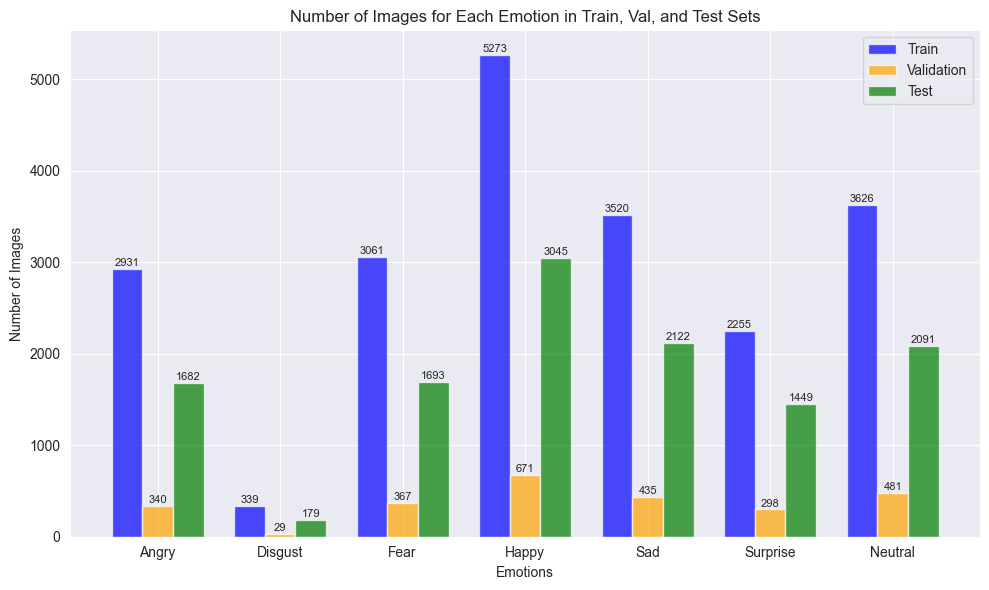

In [31]:
import matplotlib.pyplot as plt

# Example counts for each emotion in train, val, and test sets
# Replace these with your actual counts
train_counts = [angry, disgust, fear, happy, sad, surprise, neutral]
val_counts   = [angry_val, disgust_val, fear_val, happy_val, sad_val, surprise_val, neutral_val]
test_counts  = [angry_test, disgust_test, fear_test, happy_test, sad_test, surprise_test, neutral_test]

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))

bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val   = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test  = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Function to add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        # Adjust yval + X as needed to avoid overlapping text with the bars
        plt.text(bar.get_x() + bar.get_width()/2,
                 yval + 10,  # offset for the text from the top of the bar
                 int(yval),
                 ha='center', va='bottom', fontsize=8)

# Add labels for each group
add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.tight_layout()
plt.show()


# Training the Model

In [3]:
import torch
torch.cuda.is_available()

False

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import cv2

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define batch size & data paths
batch_size = 64
train_dir = "../data/fer2013/train"
val_dir = "../data/fer2013/val"
test_dir = "../data/fer2013/test"

# Define transformations (Equivalent to rescale=1./255 in TensorFlow)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to 1-channel grayscale
    transforms.Resize((48, 48)),  # Resize to 48x48
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (scales values to [-1,1])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create data loaders (Equivalent to train_generator, validation_generator)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print dataset info
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Using device: cuda
Train samples: 21005
Validation samples: 2621
Test samples: 12261


In [6]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=7):  # FER2013 has 7 classes
        super(CNNModel, self).__init__()

        # Convolutional Block 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)

        # Convolutional Block 2
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        # Convolutional Block 3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.dropout3 = nn.Dropout(0.25)

        # Fully Connected Layers
        self.fc1 = nn.Linear(32 * 6 * 6, 256)  # Adjust for 48x48 images
        self.fc_dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)  # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)

        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout3(x)

        x = torch.flatten(x, start_dim=1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc_dropout(x)

        x = self.fc2(x)  # Output logits
        return x

# Instantiate model and move to GPU
model = CNNModel(num_classes=7).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print model summary
print(model)


CNNModel(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc_dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=7, bias=True)
)


In [7]:
# Lists for tracking training progress
num_epochs = 50
train_acc_list, val_acc_list = [], []
train_loss_list, val_loss_list = [], []

# 🔹 Training Loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_acc = 100 * correct_train / total_train
    train_loss = running_loss / len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_acc = 100 * correct_val / total_val
    val_loss = val_loss / len(val_loader)
    val_acc_list.append(val_acc)
    val_loss_list.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/50], Train Loss: 1.7026, Train Acc: 31.47% | Val Loss: 1.5175, Val Acc: 43.00%
Epoch [2/50], Train Loss: 1.5196, Train Acc: 40.93% | Val Loss: 1.3638, Val Acc: 47.58%
Epoch [3/50], Train Loss: 1.4465, Train Acc: 44.21% | Val Loss: 1.2969, Val Acc: 50.21%
Epoch [4/50], Train Loss: 1.3985, Train Acc: 46.36% | Val Loss: 1.2686, Val Acc: 51.13%
Epoch [5/50], Train Loss: 1.3608, Train Acc: 48.15% | Val Loss: 1.2416, Val Acc: 52.42%
Epoch [6/50], Train Loss: 1.3370, Train Acc: 48.94% | Val Loss: 1.2148, Val Acc: 53.00%
Epoch [7/50], Train Loss: 1.3127, Train Acc: 49.70% | Val Loss: 1.1943, Val Acc: 54.33%
Epoch [8/50], Train Loss: 1.2957, Train Acc: 50.36% | Val Loss: 1.1893, Val Acc: 54.56%
Epoch [9/50], Train Loss: 1.2688, Train Acc: 51.61% | Val Loss: 1.1781, Val Acc: 54.14%
Epoch [10/50], Train Loss: 1.2561, Train Acc: 51.75% | Val Loss: 1.1561, Val Acc: 55.21%
Epoch [11/50], Train Loss: 1.2464, Train Acc: 52.22% | Val Loss: 1.1429, Val Acc: 55.59%
Epoch [12/50], Train Loss: 1.2

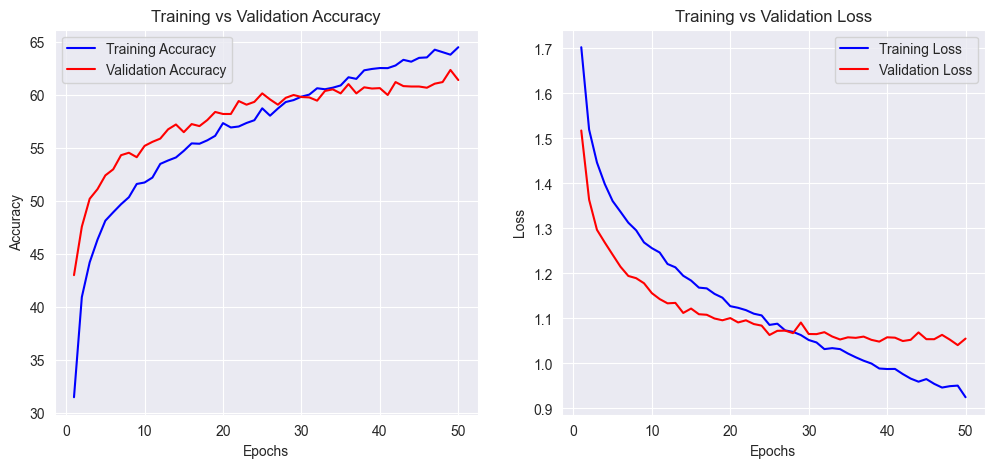

In [8]:
def plot_training_history(train_acc_list, val_acc_list, train_loss_list, val_loss_list, num_epochs):
    """
    Plots training and validation accuracy/loss over epochs.

    Args:
    - train_acc_list (list): Training accuracy per epoch
    - val_acc_list (list): Validation accuracy per epoch
    - train_loss_list (list): Training loss per epoch
    - val_loss_list (list): Validation loss per epoch
    - num_epochs (int): Total number of epochs
    """
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc_list, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc_list, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss_list, 'b', label='Training Loss')
    plt.plot(epochs, val_loss_list, 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

# Call the plotting function
plot_training_history(train_acc_list, val_acc_list, train_loss_list, val_loss_list, num_epochs)

In [9]:
# Set model to evaluation mode
model.eval()

# Initialize variables for tracking loss and accuracy
correct_test = 0
total_test = 0
test_loss = 0.0

# Define loss function (same as during training)
criterion = nn.CrossEntropyLoss()

# Disable gradient calculations for inference
with torch.no_grad():
    for inputs, labels in test_loader:  # Iterate through test dataset
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)  # Get class predictions
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

# Compute final loss and accuracy
test_loss /= len(test_loader)  # Average loss
test_accuracy = 100 * correct_test / total_test  # Accuracy percentage

# Print evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 1.0609
Test Accuracy: 61.23%


In [10]:
# After training, save only the state dict:
torch.save(model.state_dict(), "../Backend/models/emotion_model_2_state.pth")


In [40]:
# import torch
#
# # Save both the model and optimizer state
# torch.save({
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'classes': ["Angry", "Happy", "Sad", "Calm", "Neutral", "Disgust", "Fear"]
# }, "emotion_model_1.pth")
#
# print("Model saved successfully!")


Model saved successfully!


In [41]:
# import torch
#
# # Save the entire model (architecture + weights)
# torch.save(model, "../models/emotion_model_1_full.pth")
#
# print("Model saved successfully like TensorFlow .h5")


Model saved successfully like TensorFlow .h5
